### Approaches to Solving MDPs III: Temporal Difference

### University of Virginia
### Reinforcement Learning
#### Last updated: January 31, 2025

---


### SOURCES 

- Reinforcement Learning, RS Sutton & AG Barto, 2nd edition. Chapter 6
- Mastering Reinforcement Learning with Python, Enes Bilgin. Chapter 5

### LEARNING OUTCOMES

- Understand how the temporal-difference method makes updates
- Explain how TD updates are an improvement over MC updates
- Explain how Q-learning works

### CONCEPTS

- Temporal-Difference method
- Temporal-Difference error
- Sarsa
- Q-learning

---  

### Temporal-Difference (TD) Methods

TD learning is a central and novel idea in RL

Learns from experience without a model (like MC)

Updates estimates based on other learned estimates (bootstrapping, like DP)

Difference from MC: TD makes useful updates after each time step

In the below illustration, TD makes updates after each step. MC makes updates after full trajectory.

**Illustration Comparing MC Updates to TD Updates**

<img src="./driving_home.png"  width=700>  


One limitation of MC is that we must simulate a full trajectory before updating a policy. This is because the target is the gain $G_t$.

**Revisiting the commute time example**  

If we realize mid-trip that we're running 30 minutes late, we can use this information  
mid-trip to update the total commute time estimate.


**What do we mean by bootstrapping?**  
Basing an update on an existing estimate. The initial estimates are incorrect but useful as we can refine them.


**TD(0)** is a method that learns after one time step  

The method is mathematically sound and for any policy $\pi$, the estimate of value function $v_\pi$ converges

Modern RL algorithms implement TD methods with function approximation - specifically neural nets

Here is the TD(0) backup diagram, which shows flow from state -> action -> next state

<img src="./td_backup.png" width=30>

#### TD Prediction

Let's start with state-value function of policy $\pi$ starting from state *s*:

$v_\pi(s) = \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t=s]$

Taking a step from *s* under $\pi$ produces action *a*, reward *r* and next state *s'*

observed quantity $r + \gamma v_\pi(s')$ gives new estimate of $v_\pi(s)$ based on one sample

**Important idea: use this observation to update the existing value estimate by moving it closer to new observation** 

Don't want to discard old estimate, as new one may be noisy and it's sample size of one.


#### Update Rule

We update $v_\pi(s)$ after a single step by computing the convex combination of its old estimate and the observed quantity.  

A weight $\alpha\in (0,1]$ is applied for mixing the two, where larger value weights the recent observation more heavily.  

The $\alpha$ portion is applied to the recent observation.

We will use $V$ to denote values which are based on sample data under policy $\pi$.

$V(s) := (1-\alpha) V(s) + \alpha (r + \gamma V(s'))$ 

Notice: we now have a way to update the state value after a single transition based on data.

#### TD Error

Let's rearrange the update equation:


$
\begin{aligned}  
V(s) &:= (1-\alpha) V(s) + \alpha (r + \gamma V(s'))  \\
&= V(s) + \alpha [r + \gamma V(s') -  V(s)]
\end{aligned}
$

This form make the update clear, and it presents a term $[r + \gamma V(s') -  V(s)]$ which we call *TD error*.  

We saw an update form like this earlier. A similar form appears in gradient descent.

**Question 1**  
Think about the TD error and how it works. Does it make sense?

**Question 2**  
What happens when $\alpha=0$? What happens when $\alpha=1$?  
Is it a good idea to use these values?

---

#### Finding the Optimal Policy

Very often, we won't have the environment dynamics. To improve the policy, we need estimate of the action values $q(s,a)$.

As a reminder, $q_\pi(s,a)$ represents starting in state $s$, taking action $a$ and subsequently following policy $\pi$.

Why do we take action $a$? This helps us try to improve the policy.



#### Sarsa

A popular on-policy method is *Sarsa*.  
This uses the behavior policy.  
It considers transitions from one state-action pair $ (S_t, A_t) $ to another $ (S_{t+1}, A_{t+1}) $.

Given the reward that occurs $R_{t+1}$, we have the tuple  
$ (S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1}) $  
which is the source of the name $Sarsa$

See Sutton & Barto Ch 6.4 for details.  

<img src="./sarsa.png">

Notice Sarsa follows the policy to decide actions $A$ and $A'$

#### Q-learning

A popular off-policy method is *Q-learning*.  
Recall that in off-policy learning, there is a target policy and a separate behavior policy.

Q-Learning and related methods are very popular in RL.

We will discuss *Q-learning* going forward.  
Taking TD(0) update steps will be essential.

Algorithm shown below.   
The update step uses the TD error, and $\alpha$ controls learning rate.  
Under target policy, the action used in the update step will be the one that maximizes the value estimate $Q$.  
Under behavior policy, the action taken may be different; the policy can be $\epsilon$-greedy, for example.  
By keeping evaluation separate from the action taken, it allows for exploration without penalty.

Notice the update happens after each transition from $(S,A)$ to $(S',a)$.  
We show SARSA again to draw the comparison: 
- SARSA will follow the policy to generate A'
- Q-learning will select the action with max Q

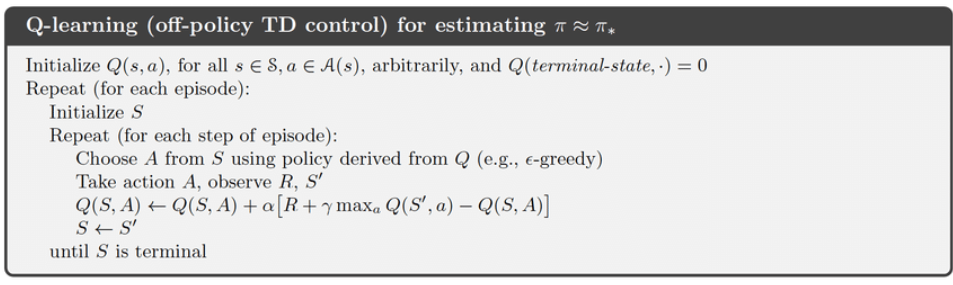

<img src="./sarsa.png">

**Example of separate policies**:  
Your estimate of the shortest commute time from home to work is 20 minutes.  
Under behavior policy, you explore and try a different turn (action=$A$)  
and find it takes 5 minutes longer (reward $R$ will be lower)  
The $Q(S,A)$ update will be lowered  
The target policy (which is best thinking) won't be impacted by this bad action

---